In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('online_shoppers_intention.csv')
print(df.info())
df_c = df.copy()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [6]:
def create_target_var(df_in: pd.DataFrame) -> pd.DataFrame:
    print(50*"==")
    print("Purchase distribution before target:")
    print(df_in.groupby('Revenue')['Revenue'].count())
    df_out = df_in.copy()

    df_out['has_purchase'] = (
        df_out['Revenue'].apply(lambda x: 1 if x == True else 0)
    )

    print(50*"==")
    print("Purchase distribution after target:")
    print(df_out.groupby(['Revenue', 'has_purchase'])['Revenue'].count())
    df_out.drop(columns=['Revenue'], inplace=True)
    return df_out

# Transform target
df = create_target_var(df)
df.head(10)

Purchase distribution before target:
Revenue
False    10422
True      1908
Name: Revenue, dtype: int64
Purchase distribution after target:
Revenue  has_purchase
False    0               10422
True     1                1908
Name: Revenue, dtype: int64


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,has_purchase
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,0
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,0
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,0
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,0
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,0


In [7]:
print(f"Negative class distribution (has_purchase=0): {df['has_purchase'].value_counts()[0] / len(df)}")
print(f"Positive class distribution (has_purchase=1): {df['has_purchase'].value_counts()[1] / len(df)}")

Negative class distribution (has_purchase=0): 0.8452554744525548
Positive class distribution (has_purchase=1): 0.15474452554744525


In [8]:
null_summary = pd.DataFrame({
    'null_count': df.isnull().sum(),
    'null_percentage': df.isnull().mean() * 100
}).sort_values(by='null_count', ascending=False)

null_summary

,null_count,null_percentage
Administrative,0,0.0
Administrative_Duration,0,0.0
Weekend,0,0.0
VisitorType,0,0.0
TrafficType,0,0.0
Region,0,0.0
Browser,0,0.0
OperatingSystems,0,0.0
Month,0,0.0
SpecialDay,0,0.0


In [9]:
df_unique_count = pd.DataFrame({
    'dtype': df.dtypes,
    'unique_count': df.nunique()
}).sort_values(by='unique_count', ascending=True)

df_unique_count

,dtype,unique_count
has_purchase,int64,2
Weekend,bool,2
VisitorType,object,3
SpecialDay,float64,6
OperatingSystems,int64,8
Region,int64,9
Month,object,10
Browser,int64,13
Informational,int64,17
TrafficType,int64,20


In [10]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'has_purchase'],
      dtype='object')

In [14]:
df_unique_count[df_unique_count.unique_count < 100].index.tolist()

['has_purchase',
 'Weekend',
 'VisitorType',
 'SpecialDay',
 'OperatingSystems',
 'Region',
 'Month',
 'Browser',
 'Informational',
 'TrafficType',
 'Administrative']

In [15]:
CAT_FEATURES = [
    'Weekend', 'VisitorType', 'SpecialDay',
    'OperatingSystems', 'Region', 'Month', 'Browser', 'Informational',
    'TrafficType', 'Administrative'
]

cat_feat = df_unique_count[df_unique_count.unique_count < 100].index.tolist()

NUM_FEATURES = [i for i in df.columns if i not in cat_feat]
NUM_FEATURES

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

--- Administrative_Duration ---
count    12330.000000
mean        80.818611
std        176.779107
min          0.000000
25%          0.000000
50%          7.500000
75%         93.256250
max       3398.750000
Name: Administrative_Duration, dtype: float64




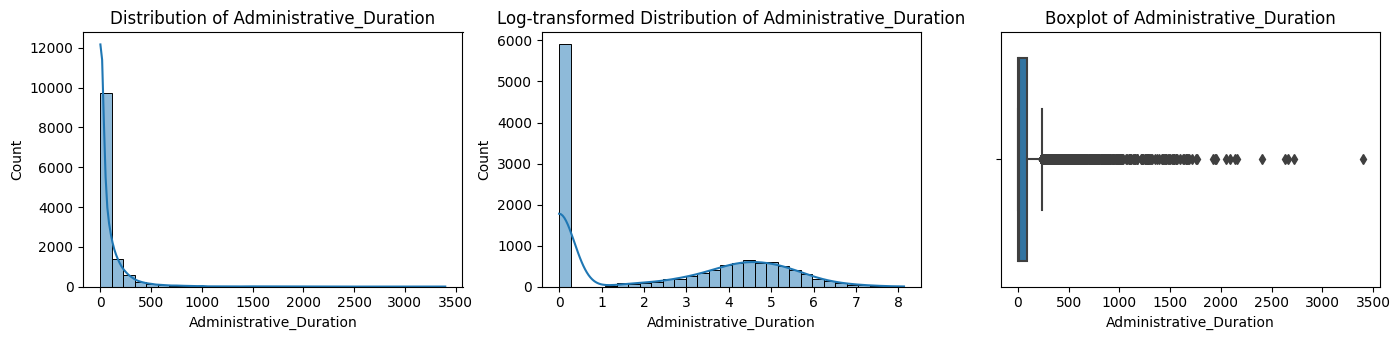

--- Informational_Duration ---
count    12330.000000
mean        34.472398
std        140.749294
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2549.375000
Name: Informational_Duration, dtype: float64




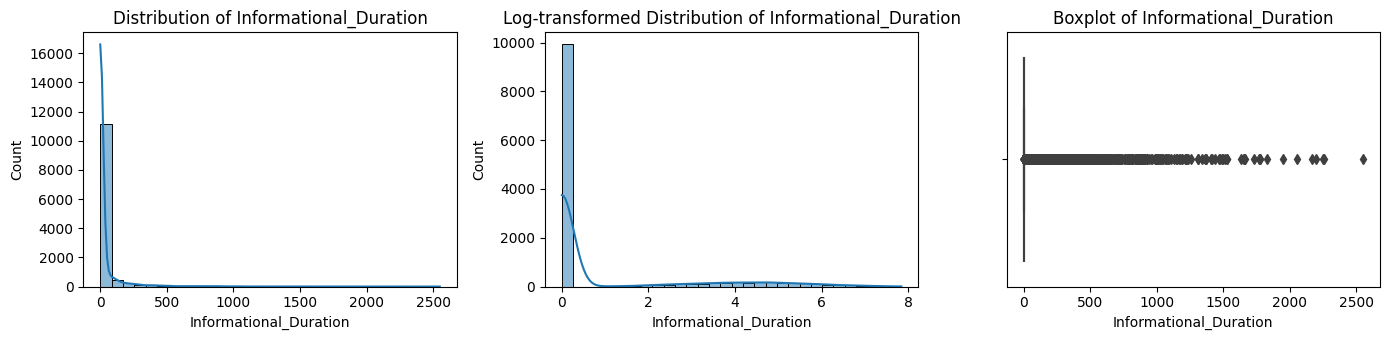

--- ProductRelated ---
count    12330.000000
mean        31.731468
std         44.475503
min          0.000000
25%          7.000000
50%         18.000000
75%         38.000000
max        705.000000
Name: ProductRelated, dtype: float64




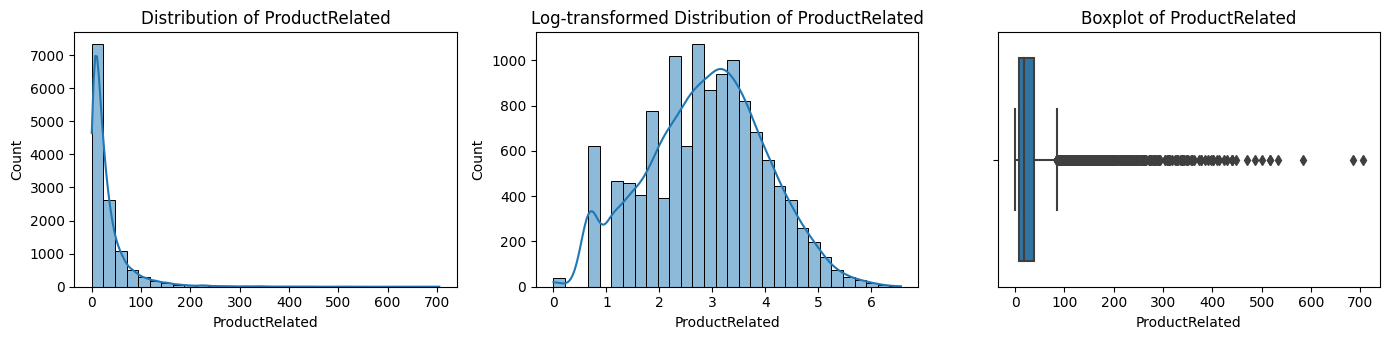

--- ProductRelated_Duration ---
count    12330.000000
mean      1194.746220
std       1913.669288
min          0.000000
25%        184.137500
50%        598.936905
75%       1464.157214
max      63973.522230
Name: ProductRelated_Duration, dtype: float64




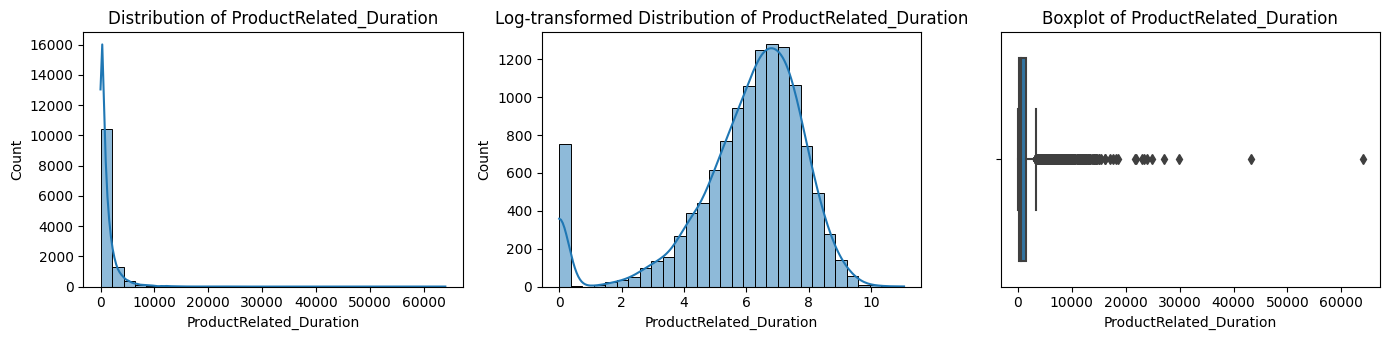

--- BounceRates ---
count    12330.000000
mean         0.022191
std          0.048488
min          0.000000
25%          0.000000
50%          0.003112
75%          0.016813
max          0.200000
Name: BounceRates, dtype: float64




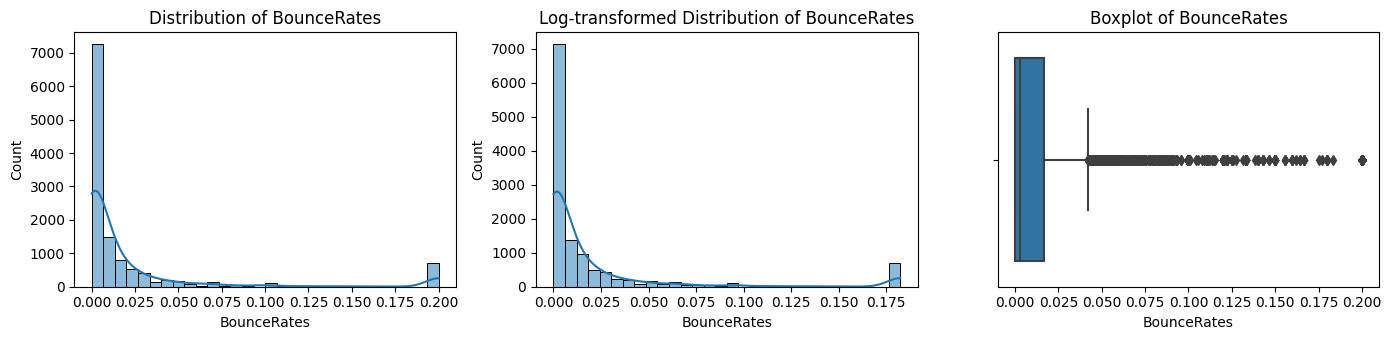

--- ExitRates ---
count    12330.000000
mean         0.043073
std          0.048597
min          0.000000
25%          0.014286
50%          0.025156
75%          0.050000
max          0.200000
Name: ExitRates, dtype: float64




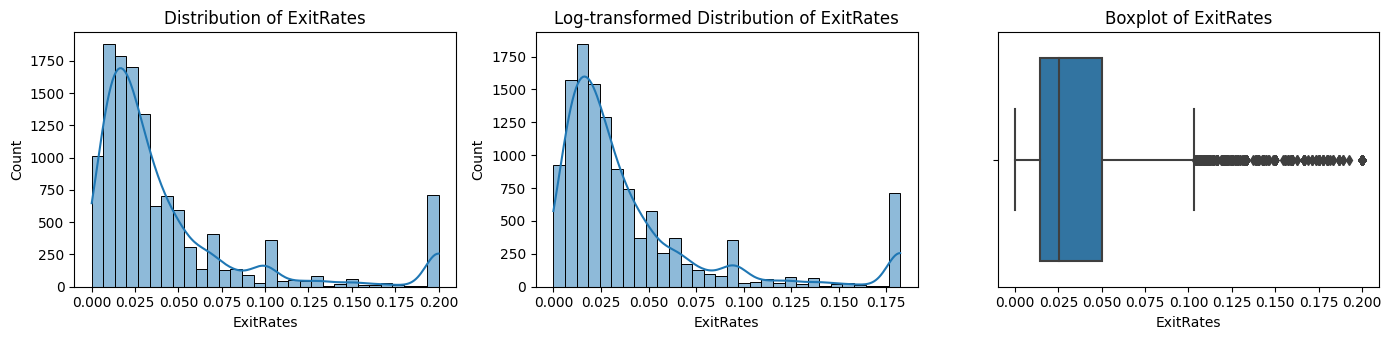

--- PageValues ---
count    12330.000000
mean         5.889258
std         18.568437
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        361.763742
Name: PageValues, dtype: float64




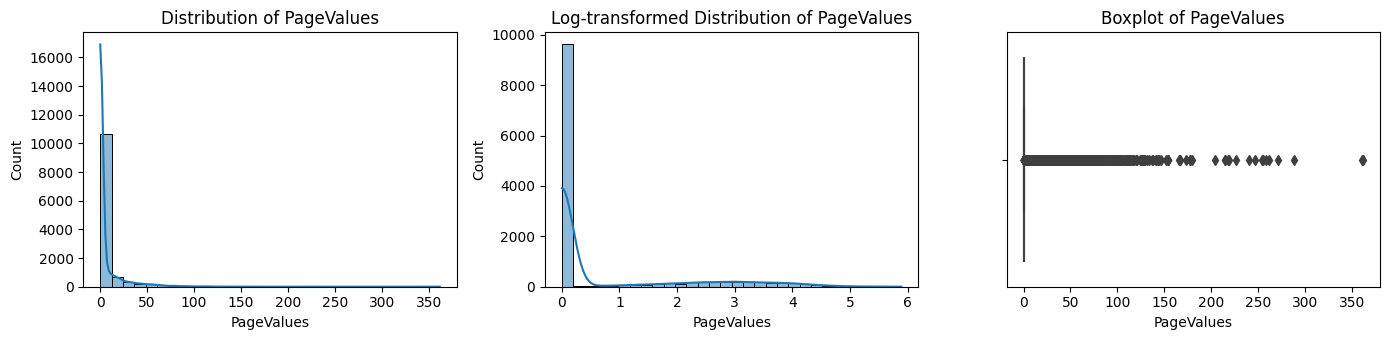

In [18]:
for col in NUM_FEATURES:
    print(f"--- {col} ---")
    print(df[col].describe())
    print("\n")

    fig, axes = plt.subplots(1, 3, figsize=(14, 3.5))
    sns.histplot(
        df[col],
        kde=True,
        bins=30,
        ax=axes[0]
    )
    axes[0].set_title(f'Distribution of {col}')

    # Log-transformed histogram
    sns.histplot(
        np.log1p(df[col]),  # log(x + 1) to handle zeros
        kde=True,
        bins=30,
        ax=axes[1]
    )
    axes[1].set_title(f'Log-transformed Distribution of {col}')

    sns.boxplot(x=df[col], ax=axes[2])
    axes[2].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

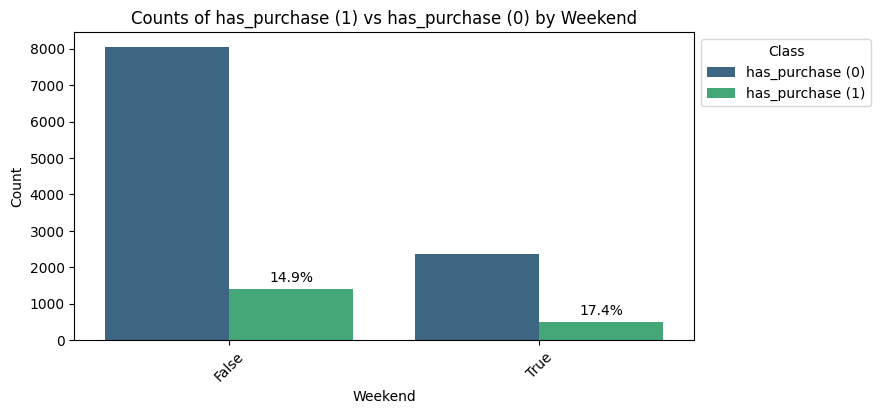

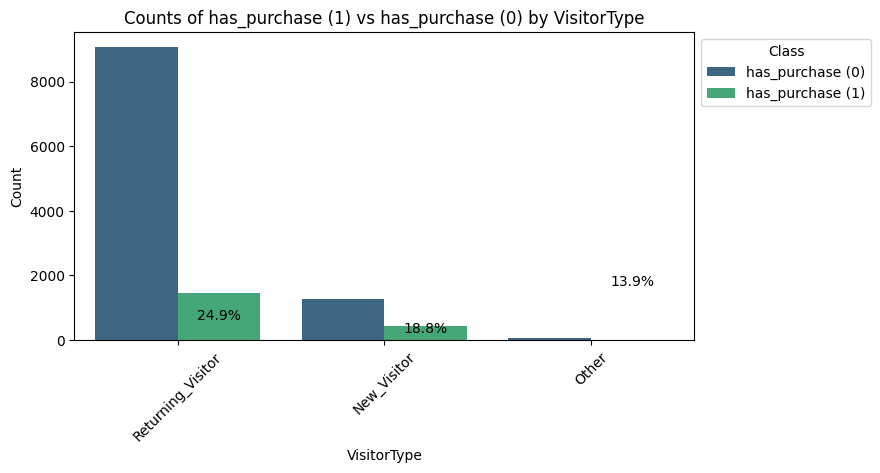

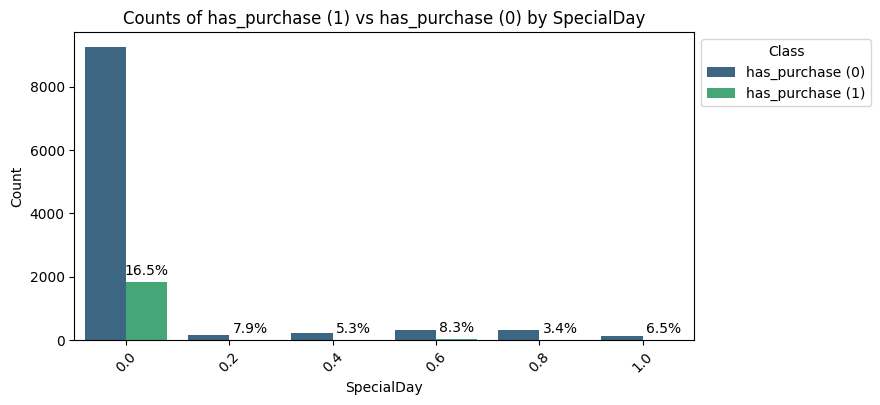

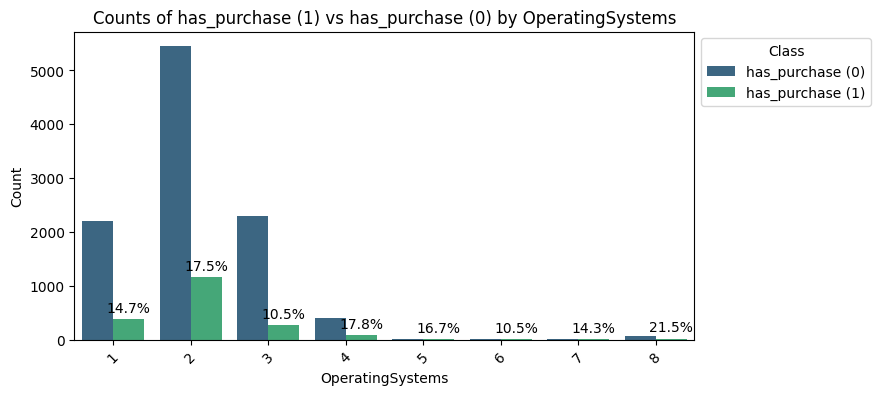

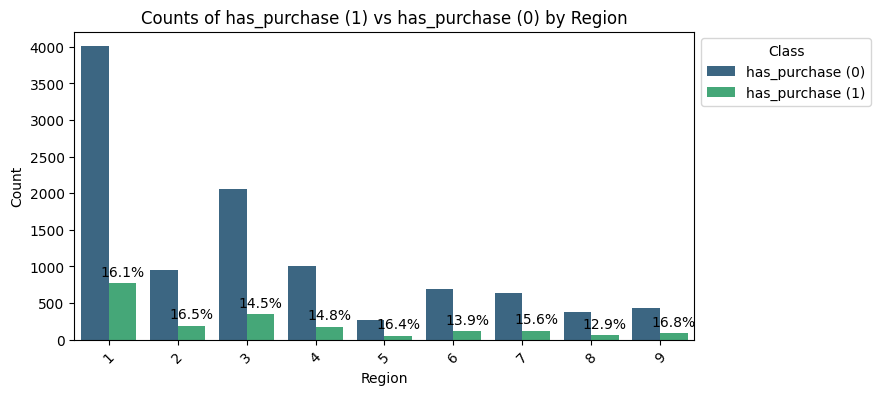

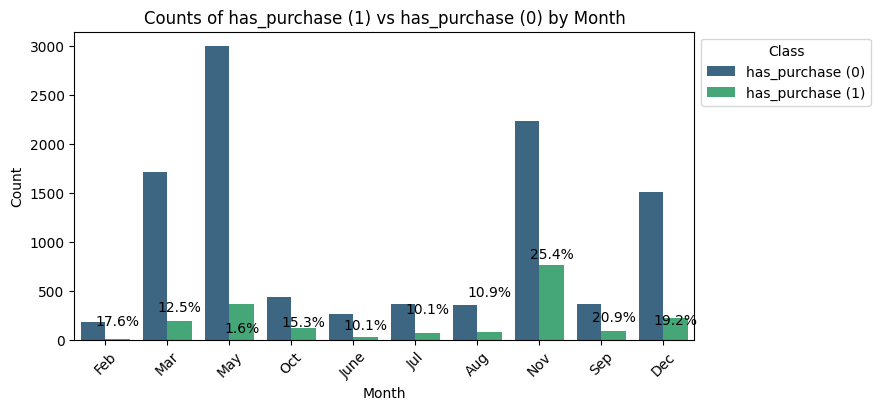

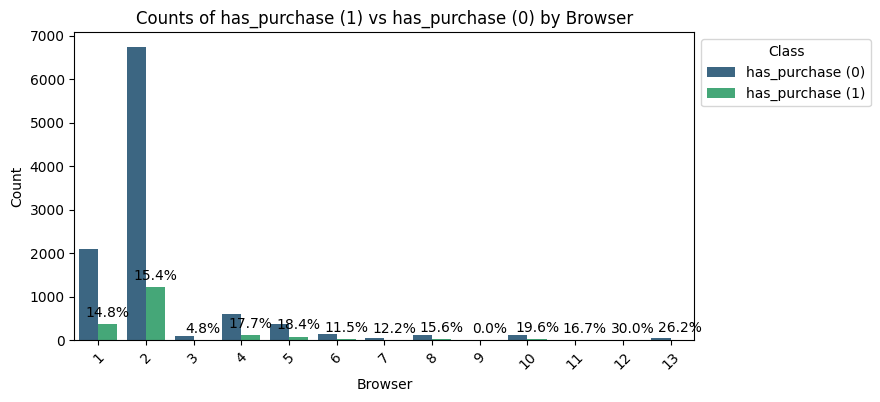

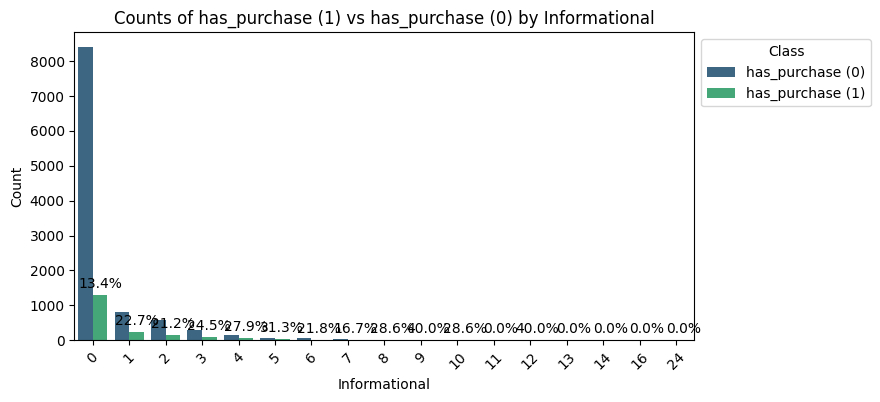

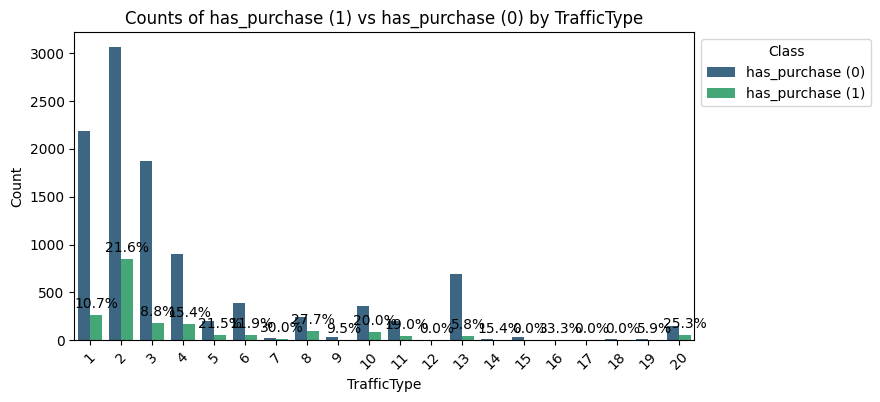

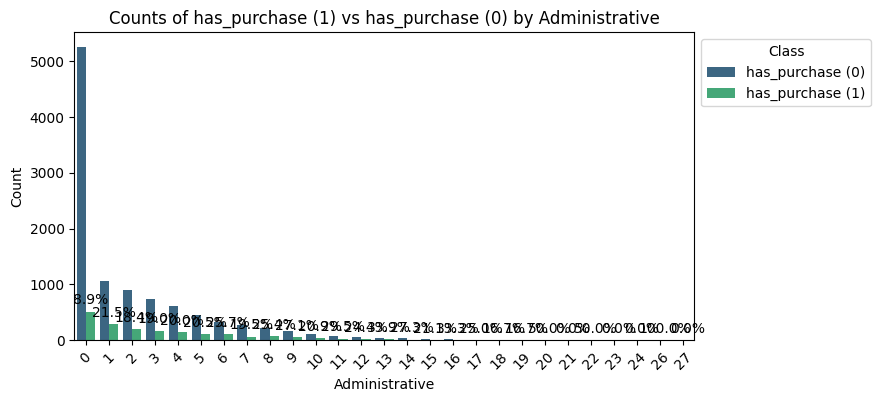

In [19]:
for col in CAT_FEATURES:
    # df_agg = df.groupby(col)['is_luxury'].sum().reset_index()
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(x=col, hue='has_purchase', data=df, palette='viridis', hue_order=[0,1])
    # Calculate percentage of 1 per feature value
    # counts = df.groupby(col)['has_purchase'].value_counts().unstack(fill_value=0)
    # counts['pct_1'] = counts[1] / (counts[0] + counts[1]) * 100
    counts = pd.crosstab(df[col], df['has_purchase'])
    counts['pct_1'] = counts[1] / (counts[0] + counts[1]) * 100
    for i, feature_val in enumerate(counts.index):
        height = counts.loc[feature_val, 1]  # count of luxury=1
        pct = counts.loc[feature_val, 'pct_1']  # percentage of 1 for this value
        # There are two bars per group; luxury=1 is the second bar in the group
        x = i + 0.2  # offset for the second bar, tweak as needed depending on palette/hue spacing
        ax.annotate(f'{pct:.1f}%', xy=(x, height), xytext=(0, 3),
                    textcoords='offset points', ha='center', va='bottom', fontsize=10)

    plt.title(f'Counts of has_purchase (1) vs has_purchase (0) by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Class', labels=['has_purchase (0)', 'has_purchase (1)'], loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()